In [140]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e6/sample_submission.csv
/kaggle/input/playground-series-s5e6/train.csv
/kaggle/input/playground-series-s5e6/test.csv


In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
train=pd.read_csv('/kaggle/input/playground-series-s5e6/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s5e6/test.csv')

In [143]:
train.head(5)

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [145]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           250000 non-null  int64 
 1   Temparature  250000 non-null  int64 
 2   Humidity     250000 non-null  int64 
 3   Moisture     250000 non-null  int64 
 4   Soil Type    250000 non-null  object
 5   Crop Type    250000 non-null  object
 6   Nitrogen     250000 non-null  int64 
 7   Potassium    250000 non-null  int64 
 8   Phosphorous  250000 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 17.2+ MB


In [146]:
train.isnull().sum()

id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [147]:
test.isnull().sum()

id             0
Temparature    0
Humidity       0
Moisture       0
Soil Type      0
Crop Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
dtype: int64

In [148]:
train.shape

(750000, 10)

In [149]:
train.dtypes  

id                  int64
Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [150]:
train.describe()

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [151]:
for col in train:
    print(col)
    print(train[col].value_counts())

id
id
749999    1
0         1
1         1
2         1
3         1
         ..
19        1
20        1
21        1
22        1
23        1
Name: count, Length: 750000, dtype: int64
Temparature
Temparature
27    55228
35    54855
32    54656
30    53867
34    53788
38    53743
36    53725
26    53310
29    53198
33    53178
31    52924
25    52876
28    52431
37    52221
Name: count, dtype: int64
Humidity
Humidity
70    33745
53    33640
62    33617
71    33525
64    33446
52    33220
66    33197
67    33132
72    33027
61    32771
60    32596
65    32541
51    32530
55    32405
68    32388
57    32342
54    32246
56    31997
50    31946
59    31843
63    31674
69    31371
58    30801
Name: count, dtype: int64
Moisture
Moisture
61    19809
48    19386
47    19299
53    19270
46    19180
39    19163
51    19155
58    18867
45    18864
34    18829
52    18791
62    18748
64    18745
43    18700
33    18676
37    18604
57    18585
65    18450
60    18433
35    18290
54    18264
38    18243


In [152]:
train_encoded = pd.get_dummies(train, columns=['Soil Type','Crop Type'])

In [153]:
test_encoded=pd.get_dummies(test, columns=['Soil Type','Crop Type'])

In [154]:
train_encoded.head(5)

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Black,Soil Type_Clayey,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,0,37,70,36,36,4,5,28-28,False,True,...,False,False,False,False,False,False,False,True,False,False
1,1,27,69,65,30,6,18,28-28,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,29,63,32,24,12,16,17-17-17,False,False,...,False,False,False,True,False,False,False,False,False,False
3,3,35,62,54,39,12,4,10-26-26,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,35,58,43,37,2,16,DAP,False,False,...,False,False,False,False,False,True,False,False,False,False


In [155]:
test_encoded.head(5)

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,750000,31,70,52,34,11,24,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,750001,27,62,45,30,14,15,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,750002,28,72,28,14,15,4,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3,750003,37,53,57,18,17,36,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4,750004,31,55,32,13,19,14,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [156]:
train_encoded.shape

(750000, 24)

In [157]:
test_encoded.shape

(250000, 23)

In [158]:
train_encoded['N_P_ratio'] = train_encoded['Nitrogen'] / (train_encoded['Phosphorous'] + 1)
train_encoded['N_K_ratio'] = train_encoded['Nitrogen'] / (train_encoded['Potassium'] + 1)
train_encoded['P_K_ratio'] = train_encoded['Phosphorous'] / (train_encoded['Potassium'] + 1)
train_encoded['Temp_Moisture'] = train_encoded['Temparature'] / (train_encoded['Moisture'] + 1)

In [159]:
# ✅ Step 1: Add derived features to test_encoded
test_encoded['N_P_ratio'] = test_encoded['Nitrogen'] / (test_encoded['Phosphorous'] + 1)
test_encoded['N_K_ratio'] = test_encoded['Nitrogen'] / (test_encoded['Potassium'] + 1)
test_encoded['P_K_ratio'] = test_encoded['Phosphorous'] / (test_encoded['Potassium'] + 1)
test_encoded['Temp_Moisture'] = test_encoded['Temparature'] / (test_encoded['Moisture'] + 1)


In [160]:
numeric_cols = ['Temparature', 'Humidity', 'Moisture', 
                'Nitrogen', 'Phosphorous', 'Potassium', 
                'N_P_ratio', 'N_K_ratio', 'P_K_ratio', 'Temp_Moisture']

for col in numeric_cols:
    min_val = train_encoded[col].min()
    max_val = train_encoded[col].max()
    train_encoded[col] = (train_encoded[col] - min_val) / (max_val - min_val)

In [161]:
# --- Step 1: Add engineered features ---
required_cols = ['Nitrogen', 'Phosphorous', 'Potassium', 'Temparature', 'Moisture']
for col in required_cols:
    if col not in test_encoded.columns:
        raise ValueError(f"Missing required column: {col} in test_encoded")

test_encoded['N_P_ratio'] = test_encoded['Nitrogen'] / (test_encoded['Phosphorous'] + 1)
test_encoded['N_K_ratio'] = test_encoded['Nitrogen'] / (test_encoded['Potassium'] + 1)
test_encoded['P_K_ratio'] = test_encoded['Phosphorous'] / (test_encoded['Potassium'] + 1)
test_encoded['Temp_Moisture'] = test_encoded['Temparature'] / (test_encoded['Moisture'] + 1)

# --- Step 2: Normalize ---
numeric_cols = ['Temparature', 'Humidity', 'Moisture', 
                'Nitrogen', 'Phosphorous', 'Potassium', 
                'N_P_ratio', 'N_K_ratio', 'P_K_ratio', 'Temp_Moisture']

for col in numeric_cols:
    min_val = train_encoded[col].min()
    max_val = train_encoded[col].max()
    test_encoded[col] = (test_encoded[col] - min_val) / (max_val - min_val)


In [162]:
train_encoded.head(5)

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Black,Soil Type_Clayey,...,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,N_P_ratio,N_K_ratio,P_K_ratio,Temp_Moisture
0,0,0.923077,0.909091,0.275,0.842105,0.210526,0.119048,28-28,False,True,...,False,False,False,True,False,False,0.140954,0.167464,0.023810,0.573735
1,1,0.153846,0.863636,1.000,0.684211,0.315789,0.428571,28-28,False,False,...,False,False,False,False,False,False,0.035458,0.097744,0.061224,0.027987
2,2,0.307692,0.590909,0.175,0.526316,0.631579,0.380952,17-17-17,False,False,...,False,False,False,False,False,False,0.031468,0.039382,0.029304,0.461787
3,3,0.769231,0.545455,0.725,0.921053,0.631579,0.095238,10-26-26,False,False,...,False,False,False,False,False,False,0.183907,0.066986,0.007326,0.237890
4,4,0.769231,0.363636,0.450,0.868421,0.105263,0.380952,DAP,False,False,...,False,True,False,False,False,False,0.049716,0.290271,0.126984,0.384822


In [163]:
test_encoded.head(5)

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,...,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,N_P_ratio,N_K_ratio,P_K_ratio,Temp_Moisture
0,750000,31.0,70.0,52.0,34.0,11.0,24.0,False,False,False,...,False,False,False,False,False,True,1.360000,2.833333,2.00,0.584906
1,750001,27.0,62.0,45.0,30.0,14.0,15.0,False,False,False,...,False,False,False,True,False,False,1.875000,2.000000,1.00,0.586957
2,750002,28.0,72.0,28.0,14.0,15.0,4.0,False,True,False,...,False,False,False,False,False,False,2.800000,0.875000,0.25,0.965517
3,750003,37.0,53.0,57.0,18.0,17.0,36.0,True,False,False,...,False,False,False,False,False,False,0.486486,1.000000,2.00,0.637931
4,750004,31.0,55.0,32.0,13.0,19.0,14.0,False,False,False,...,False,False,True,False,False,False,0.866667,0.650000,0.70,0.939394


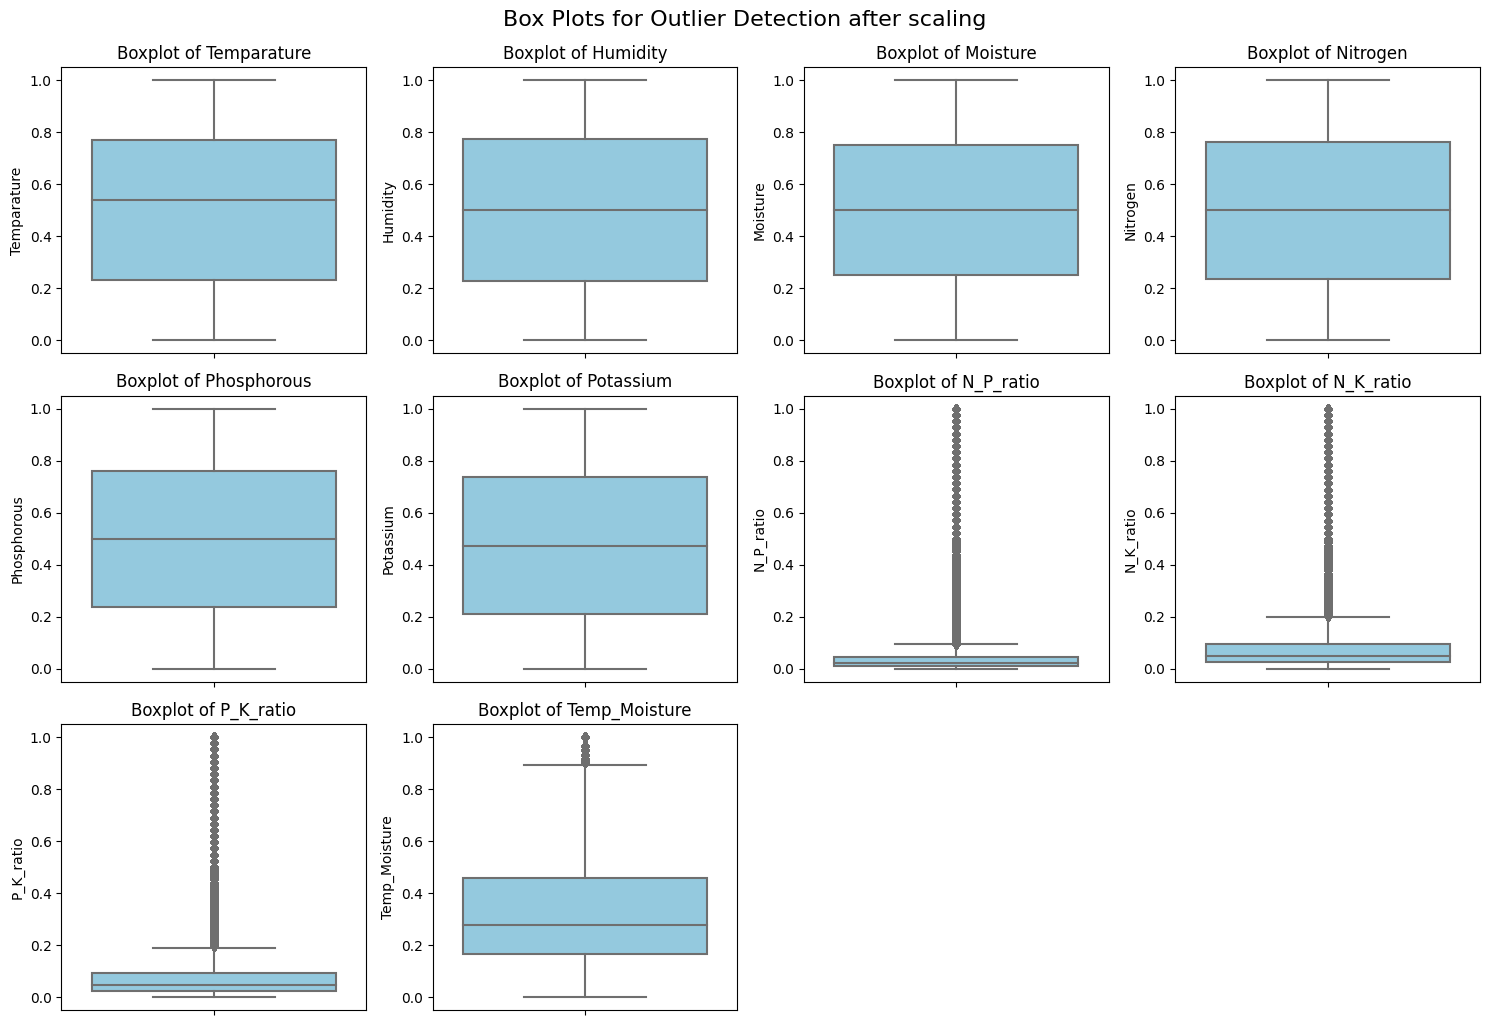

In [164]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=train_encoded[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle("Box Plots for Outlier Detection after scaling", fontsize=16, y=1.02)
plt.show()

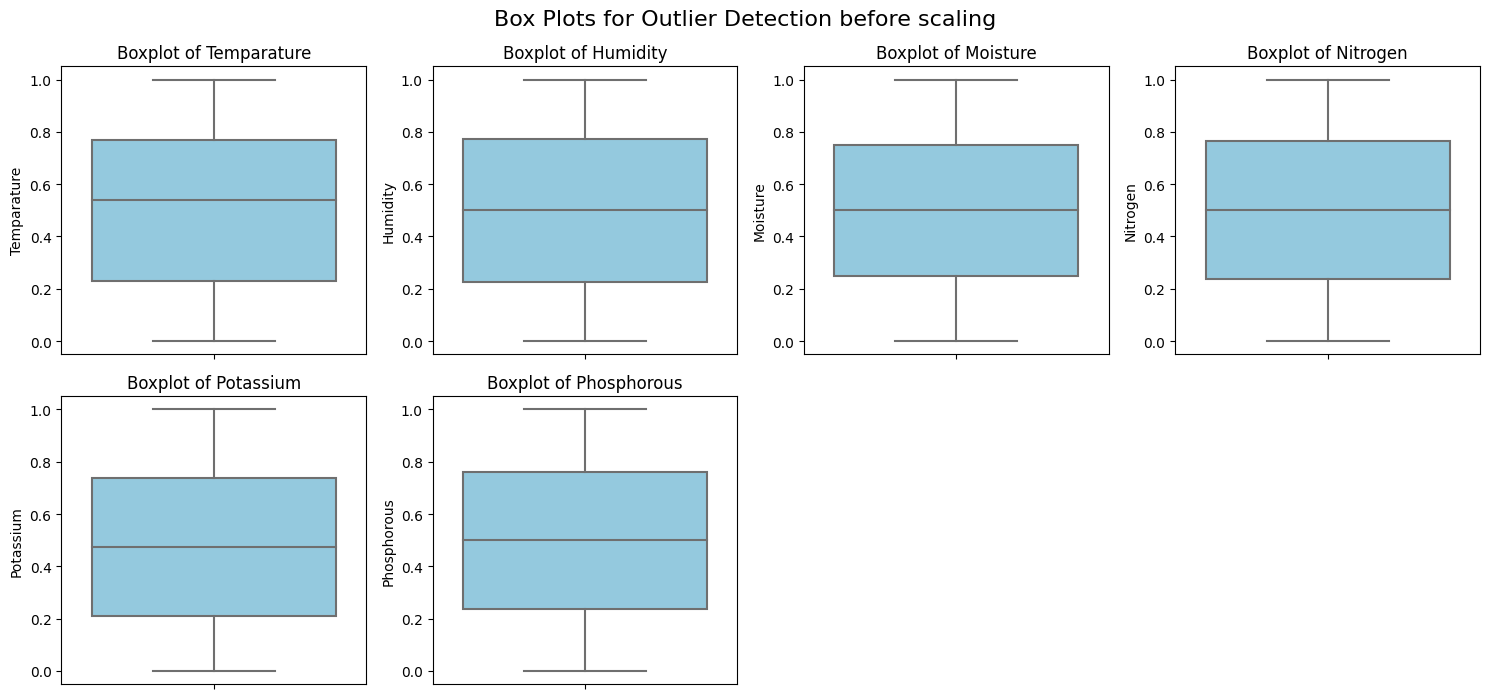

In [165]:
numeric_cols_train=['Temparature','Humidity','Moisture','Nitrogen','Potassium','Phosphorous']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols_train):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=train_encoded[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle("Box Plots for Outlier Detection before scaling", fontsize=16, y=1.02)
plt.show()

In [166]:
train_encoded.columns

Index(['id', 'Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Fertilizer Name', 'Soil Type_Black', 'Soil Type_Clayey',
       'Soil Type_Loamy', 'Soil Type_Red', 'Soil Type_Sandy',
       'Crop Type_Barley', 'Crop Type_Cotton', 'Crop Type_Ground Nuts',
       'Crop Type_Maize', 'Crop Type_Millets', 'Crop Type_Oil seeds',
       'Crop Type_Paddy', 'Crop Type_Pulses', 'Crop Type_Sugarcane',
       'Crop Type_Tobacco', 'Crop Type_Wheat', 'N_P_ratio', 'N_K_ratio',
       'P_K_ratio', 'Temp_Moisture'],
      dtype='object')

In [167]:
test_encoded.columns

Index(['id', 'Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Soil Type_Black', 'Soil Type_Clayey', 'Soil Type_Loamy',
       'Soil Type_Red', 'Soil Type_Sandy', 'Crop Type_Barley',
       'Crop Type_Cotton', 'Crop Type_Ground Nuts', 'Crop Type_Maize',
       'Crop Type_Millets', 'Crop Type_Oil seeds', 'Crop Type_Paddy',
       'Crop Type_Pulses', 'Crop Type_Sugarcane', 'Crop Type_Tobacco',
       'Crop Type_Wheat', 'N_P_ratio', 'N_K_ratio', 'P_K_ratio',
       'Temp_Moisture'],
      dtype='object')

In [168]:
X=train_encoded.drop(columns=['Fertilizer Name','id'])
X.head(5)

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,N_P_ratio,N_K_ratio,P_K_ratio,Temp_Moisture
0,0.923077,0.909091,0.275,0.842105,0.210526,0.119048,False,True,False,False,...,False,False,False,True,False,False,0.140954,0.167464,0.023810,0.573735
1,0.153846,0.863636,1.000,0.684211,0.315789,0.428571,False,False,False,False,...,False,False,False,False,False,False,0.035458,0.097744,0.061224,0.027987
2,0.307692,0.590909,0.175,0.526316,0.631579,0.380952,False,False,False,False,...,False,False,False,False,False,False,0.031468,0.039382,0.029304,0.461787
3,0.769231,0.545455,0.725,0.921053,0.631579,0.095238,False,False,False,False,...,False,False,False,False,False,False,0.183907,0.066986,0.007326,0.237890
4,0.769231,0.363636,0.450,0.868421,0.105263,0.380952,False,False,False,True,...,False,True,False,False,False,False,0.049716,0.290271,0.126984,0.384822


In [169]:
X_pred_test=test_encoded.drop(columns=['id'])
X_pred_test.head(5)

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,N_P_ratio,N_K_ratio,P_K_ratio,Temp_Moisture
0,31.0,70.0,52.0,34.0,11.0,24.0,False,False,False,False,...,False,False,False,False,False,True,1.360000,2.833333,2.00,0.584906
1,27.0,62.0,45.0,30.0,14.0,15.0,False,False,False,True,...,False,False,False,True,False,False,1.875000,2.000000,1.00,0.586957
2,28.0,72.0,28.0,14.0,15.0,4.0,False,True,False,False,...,False,False,False,False,False,False,2.800000,0.875000,0.25,0.965517
3,37.0,53.0,57.0,18.0,17.0,36.0,True,False,False,False,...,False,False,False,False,False,False,0.486486,1.000000,2.00,0.637931
4,31.0,55.0,32.0,13.0,19.0,14.0,False,False,False,True,...,False,False,True,False,False,False,0.866667,0.650000,0.70,0.939394


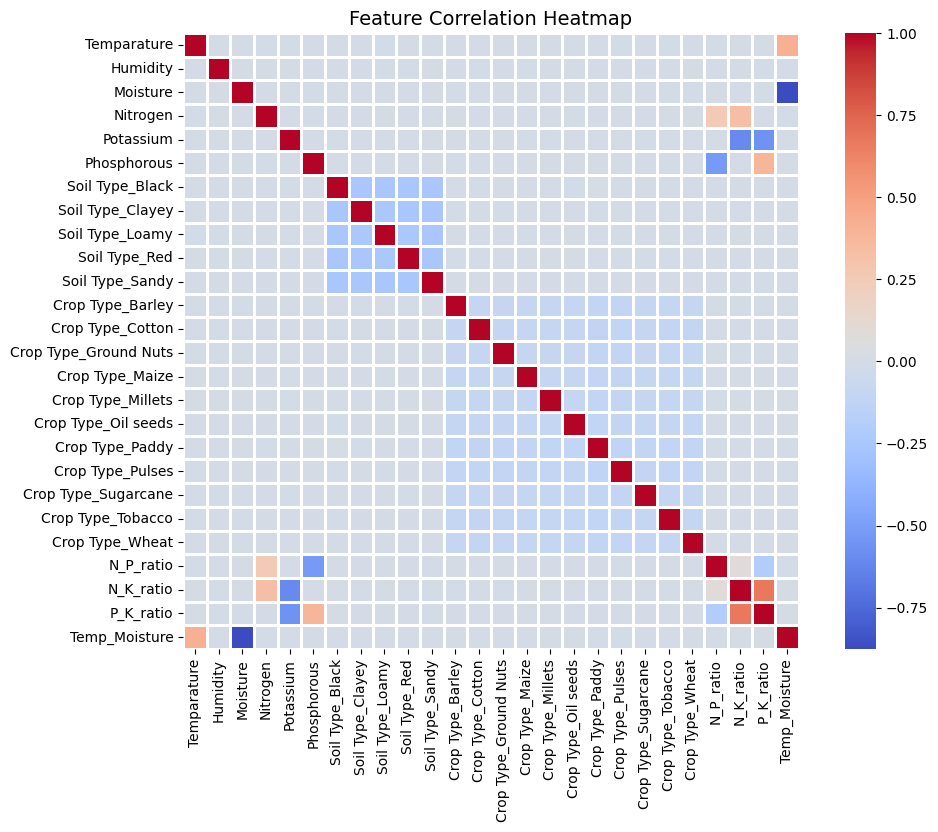

In [170]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(),            # show correlation values
            fmt=".2f",             # format values to 2 decimals
            cmap="coolwarm",       # diverging colormap: blue to red      # fix scale to full correlation range
            linewidths=1,        # borders between boxes
            square=True)           # square cells

plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

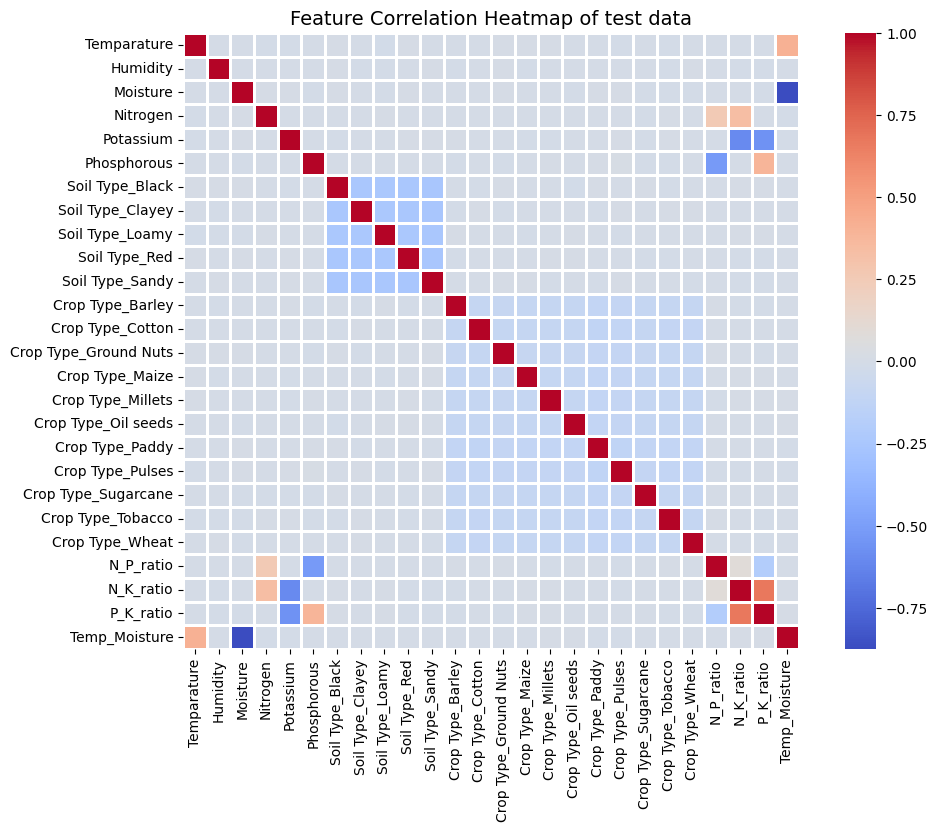

In [171]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_pred_test.corr(),            # show correlation values
            fmt=".2f",             # format values to 2 decimals
            cmap="coolwarm",       # diverging colormap: blue to red      # fix scale to full correlation range
            linewidths=1,        # borders between boxes
            square=True)           # square cells

plt.title("Feature Correlation Heatmap of test data", fontsize=14)
plt.show()

In [172]:
train_encoded.shape

(750000, 28)

In [173]:
train_encoded['Fertilizer Name'].value_counts()

Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64

In [174]:
y=train_encoded['Fertilizer Name']

In [175]:
y.head(5)

0       28-28
1       28-28
2    17-17-17
3    10-26-26
4         DAP
Name: Fertilizer Name, dtype: object

In [176]:
X = train_encoded.drop('Fertilizer Name', axis=1)

In [177]:
X.head(5)

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,...,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,N_P_ratio,N_K_ratio,P_K_ratio,Temp_Moisture
0,0,0.923077,0.909091,0.275,0.842105,0.210526,0.119048,False,True,False,...,False,False,False,True,False,False,0.140954,0.167464,0.023810,0.573735
1,1,0.153846,0.863636,1.000,0.684211,0.315789,0.428571,False,False,False,...,False,False,False,False,False,False,0.035458,0.097744,0.061224,0.027987
2,2,0.307692,0.590909,0.175,0.526316,0.631579,0.380952,False,False,False,...,False,False,False,False,False,False,0.031468,0.039382,0.029304,0.461787
3,3,0.769231,0.545455,0.725,0.921053,0.631579,0.095238,False,False,False,...,False,False,False,False,False,False,0.183907,0.066986,0.007326,0.237890
4,4,0.769231,0.363636,0.450,0.868421,0.105263,0.380952,False,False,False,...,False,True,False,False,False,False,0.049716,0.290271,0.126984,0.384822


In [178]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_int = pd.Series(le.fit_transform(y))

In [179]:
from tensorflow.keras.utils import to_categorical

y_onehot = to_categorical(y_int, num_classes=7)

In [180]:
y_onehot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [181]:
!pip install tensorflow

In [182]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# K-Fold Cross Validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
accuracies = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y_int), 1):
    print(f"\n📂 Fold {fold}")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_int[train_idx], y_int[test_idx]

    model = Sequential([
        Input(shape=(X.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(7, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    early_stop = EarlyStopping(
        monitor='loss',
        patience=5,
        restore_best_weights=True
    )

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=16,
        verbose=1,
        callbacks=[early_stop]
    )

    # Evaluate both train and test accuracy
    train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"🧠 Fold {fold} — Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")
    accuracies.append(test_acc)
    train_accuracies = []
    test_accuracies = []

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)



    # Plot training accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.title(f'Fold {fold} - Train Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

# Summary
print(f"\n🎯 Mean Train Accuracy over {k} folds: {np.mean(train_accuracies):.4f}")
print(f"📉 Train Std Deviation: {np.std(train_accuracies):.4f}")

print(f"\n🎯 Mean Test Accuracy over {k} folds: {np.mean(test_accuracies):.4f}")
print(f"📉 Test Std Deviation: {np.std(test_accuracies):.4f}")

# Per-fold gaps
for i, (train, test) in enumerate(zip(train_accuracies, test_accuracies), 1):
    gap = train - test
    print(f"Fold {i} ➤ Train: {train:.4f}, Test: {test:.4f}, Gap: {gap:.4f}")


📂 Fold 1
Epoch 1/100


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(16, 1), output.shape=(16, 7)

In [183]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
else:
    print("ℹ️ No validation accuracy available — did you set validation_split?")
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Val Loss')
else:
    print("ℹ️ No validation loss available — did you set validation_split?")
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'history' is not defined

In [184]:
# ✅ STEP 1: Install CatBoost (only required in Kaggle/local env)
!pip install -q catboost

In [185]:
X.head(5)

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,...,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,N_P_ratio,N_K_ratio,P_K_ratio,Temp_Moisture
0,0,0.923077,0.909091,0.275,0.842105,0.210526,0.119048,False,True,False,...,False,False,False,True,False,False,0.140954,0.167464,0.023810,0.573735
1,1,0.153846,0.863636,1.000,0.684211,0.315789,0.428571,False,False,False,...,False,False,False,False,False,False,0.035458,0.097744,0.061224,0.027987
2,2,0.307692,0.590909,0.175,0.526316,0.631579,0.380952,False,False,False,...,False,False,False,False,False,False,0.031468,0.039382,0.029304,0.461787
3,3,0.769231,0.545455,0.725,0.921053,0.631579,0.095238,False,False,False,...,False,False,False,False,False,False,0.183907,0.066986,0.007326,0.237890
4,4,0.769231,0.363636,0.450,0.868421,0.105263,0.380952,False,False,False,...,False,True,False,False,False,False,0.049716,0.290271,0.126984,0.384822


In [186]:
y.head(5)

0       28-28
1       28-28
2    17-17-17
3    10-26-26
4         DAP
Name: Fertilizer Name, dtype: object

In [187]:
y_int.head(5)

0    4
1    4
2    2
3    0
4    5
dtype: int64

In [188]:
print(pd.Series(y_int).value_counts(normalize=True))

1    0.152581
0    0.151849
2    0.149937
4    0.148211
3    0.147852
5    0.126480
6    0.123089
Name: proportion, dtype: float64


In [189]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X, y_int)
print(f"🧪 Dummy Accuracy (baseline): {dummy.score(X, y_int):.4f}")


🧪 Dummy Accuracy (baseline): 0.1526


In [190]:
import matplotlib.pyplot as plt

rf.fit(X, y_int)
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()


KeyboardInterrupt: 

In [191]:

# ✅ STEP 2: Imports
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


# ✅ STEP 4: K-Fold Setup
k = 5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ✅ STEP 5: Accuracy storage
results = {
    'RandomForest': [],
    'XGBoost': [],
    'CatBoost': []
}
le = LabelEncoder()
y_int = pd.Series(le.fit_transform(y))

# ✅ STEP 6: Train each model per fold
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y_int), 1):
    print(f"\n📂 Fold {fold}")
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_int.iloc[train_idx], y_int.iloc[test_idx]
    
    # 🌲 Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"🌲 Random Forest Accuracy: {rf_acc:.4f}")
    results['RandomForest'].append(rf_acc)
    
    # ⚡ XGBoost
    xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    xgb.fit(X_train, y_train)
    xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
    print(f"⚡ XGBoost Accuracy: {xgb_acc:.4f}")
    results['XGBoost'].append(xgb_acc)
    
    # 🐱 CatBoost
    cat = CatBoostClassifier(iterations=100, verbose=0, random_state=42)
    cat.fit(X_train, y_train)
    cat_acc = accuracy_score(y_test, cat.predict(X_test))
    print(f"🐱 CatBoost Accuracy: {cat_acc:.4f}")
    results['CatBoost'].append(cat_acc)

# ✅ STEP 7: Summary Report
print("\n📊 Final Results:")
for model, scores in results.items():
    print(f"{model}: Mean Acc = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}")



📂 Fold 1
🌲 Random Forest Accuracy: 0.1646
⚡ XGBoost Accuracy: 0.1887
🐱 CatBoost Accuracy: 0.1801

📂 Fold 2


KeyboardInterrupt: 


📂 Fold 1
RandomForest Accuracy: 0.9150, ROC AUC: 0.9853
              precision    recall  f1-score   support

           0     0.9038    0.9307    0.9171       101
           1     0.9271    0.8990    0.9128        99

    accuracy                         0.9150       200
   macro avg     0.9155    0.9148    0.9149       200
weighted avg     0.9153    0.9150    0.9150       200

RandomForest (Fold 1) Metrics:
🔹 Precision: 0.9271
🔹 Recall:    0.8990
🔹 F1-score:  0.9128
XGBoost Accuracy: 0.9450, ROC AUC: 0.9835
              precision    recall  f1-score   support

           0     0.9500    0.9406    0.9453       101
           1     0.9400    0.9495    0.9447        99

    accuracy                         0.9450       200
   macro avg     0.9450    0.9450    0.9450       200
weighted avg     0.9450    0.9450    0.9450       200

XGBoost (Fold 1) Metrics:
🔹 Precision: 0.9400
🔹 Recall:    0.9495
🔹 F1-score:  0.9447
CatBoost Accuracy: 0.9500, ROC AUC: 0.9897
              precision    

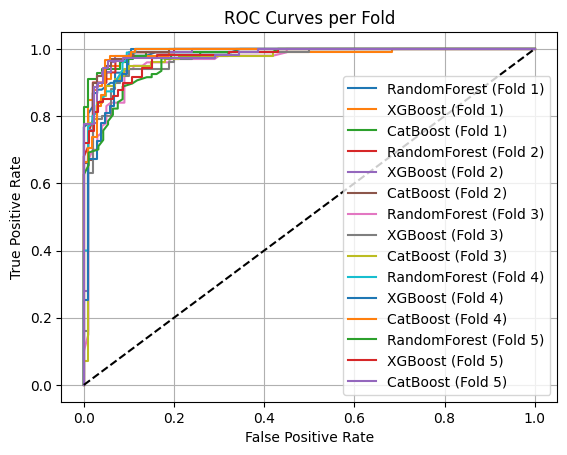


📊 Final Accuracy and AUC Summary:
RandomForest: Mean Acc = 0.9190, Mean ROC AUC = 0.9773, Std Acc = 0.0203
XGBoost: Mean Acc = 0.9280, Mean ROC AUC = 0.9767, Std Acc = 0.0186
CatBoost: Mean Acc = 0.9400, Mean ROC AUC = 0.9838, Std Acc = 0.0130

📊 Final Precision, Recall, F1-Score Summary:

📌 RandomForest:
   🔸 Avg Precision = 0.9079
   🔸 Avg Recall    = 0.9348
   🔸 Avg F1-score  = 0.9208

📌 XGBoost:
   🔸 Avg Precision = 0.9182
   🔸 Avg Recall    = 0.9408
   🔸 Avg F1-score  = 0.9292

📌 CatBoost:
   🔸 Avg Precision = 0.9301
   🔸 Avg Recall    = 0.9522
   🔸 Avg F1-score  = 0.9407


In [120]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, roc_auc_score, roc_curve,
    precision_score, recall_score, f1_score,
    classification_report
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# ✅ STEP 1: Dataset


# ✅ STEP 2: KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ✅ STEP 3: Storage initialization
results = {
    'RandomForest': [],
    'XGBoost': [],
    'CatBoost': []
}

metrics_results = {
    'RandomForest': {'precision': [], 'recall': [], 'f1': []},
    'XGBoost': {'precision': [], 'recall': [], 'f1': []},
    'CatBoost': {'precision': [], 'recall': [], 'f1': []}
}

# ✅ STEP 4: Model evaluation per fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y_int), 1):
    print(f"\n📂 Fold {fold}")
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y_int.iloc[train_idx], y_int.iloc[test_idx]
    
    models = {
        "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42),
        "CatBoost": CatBoostClassifier(iterations=100, verbose=0, random_state=42)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        probs = model.predict_proba(X_test)[:, 1]  # For ROC curve

        acc = accuracy_score(y_test, preds)
        roc_auc = roc_auc_score(y_test, probs)

        print(f"{name} Accuracy: {acc:.4f}, ROC AUC: {roc_auc:.4f}")
        print(classification_report(y_test, preds, digits=4))

        results[name].append((acc, roc_auc))

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, probs)
        plt.plot(fpr, tpr, label=f'{name} (Fold {fold})')

        # Precision/Recall/F1
        precision = precision_score(y_test, preds)
        recall = recall_score(y_test, preds)
        f1 = f1_score(y_test, preds)

        print(f"{name} (Fold {fold}) Metrics:")
        print(f"🔹 Precision: {precision:.4f}")
        print(f"🔹 Recall:    {recall:.4f}")
        print(f"🔹 F1-score:  {f1:.4f}")

        metrics_results[name]['precision'].append(precision)
        metrics_results[name]['recall'].append(recall)
        metrics_results[name]['f1'].append(f1)

# ✅ STEP 5: Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves per Fold")
plt.legend()
plt.grid()
plt.show()

# ✅ STEP 6: Summary Report
print("\n📊 Final Accuracy and AUC Summary:")
for model, scores in results.items():
    accs, rocs = zip(*scores)
    print(f"{model}: Mean Acc = {np.mean(accs):.4f}, Mean ROC AUC = {np.mean(rocs):.4f}, Std Acc = {np.std(accs):.4f}")

print("\n📊 Final Precision, Recall, F1-Score Summary:")
for model in metrics_results:
    precision_avg = np.mean(metrics_results[model]['precision'])
    recall_avg = np.mean(metrics_results[model]['recall'])
    f1_avg = np.mean(metrics_results[model]['f1'])

    print(f"\n📌 {model}:")
    print(f"   🔸 Avg Precision = {precision_avg:.4f}")
    print(f"   🔸 Avg Recall    = {recall_avg:.4f}")
    print(f"   🔸 Avg F1-score  = {f1_avg:.4f}")


In [192]:
from catboost import CatBoostClassifier

# Re-train CatBoost on full training data
X_train_full=X
y_train_full=y_int
cat_final = CatBoostClassifier(iterations=100, verbose=0, random_state=42)
cat_final.fit(X_train_full, y_train_full)

In [194]:
X_pred_test

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,N_P_ratio,N_K_ratio,P_K_ratio,Temp_Moisture
0,31.0,70.0,52.0,34.0,11.0,24.0,False,False,False,False,...,False,False,False,False,False,True,1.360000,2.833333,2.000000,0.584906
1,27.0,62.0,45.0,30.0,14.0,15.0,False,False,False,True,...,False,False,False,True,False,False,1.875000,2.000000,1.000000,0.586957
2,28.0,72.0,28.0,14.0,15.0,4.0,False,True,False,False,...,False,False,False,False,False,False,2.800000,0.875000,0.250000,0.965517
3,37.0,53.0,57.0,18.0,17.0,36.0,True,False,False,False,...,False,False,False,False,False,False,0.486486,1.000000,2.000000,0.637931
4,31.0,55.0,32.0,13.0,19.0,14.0,False,False,False,True,...,False,False,True,False,False,False,0.866667,0.650000,0.700000,0.939394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,26.0,66.0,30.0,14.0,7.0,18.0,False,False,False,True,...,False,False,False,True,False,False,0.736842,1.750000,2.250000,0.838710
249996,33.0,62.0,55.0,28.0,14.0,7.0,False,False,False,True,...,False,False,True,False,False,False,3.500000,1.866667,0.466667,0.589286
249997,36.0,53.0,64.0,28.0,11.0,27.0,True,False,False,False,...,False,True,False,False,False,False,1.000000,2.333333,2.250000,0.553846
249998,36.0,67.0,26.0,33.0,0.0,10.0,False,True,False,False,...,False,True,False,False,False,False,3.000000,33.000000,10.000000,1.333333


In [198]:
X_pred_test = test_encoded.drop(columns=['id'])

In [202]:
trained_feature_columns = X_train_full.columns.tolist()

# Prepare test data (drop 'id' if it's there)
X_pred_test = test_encoded[trained_feature_columns]

# Predict with trained model
y_test_pred = cat_final.predict(X_pred_test)

# Decode if labels were encoded before
y_test_pred_labels = le.inverse_transform(y_test_pred)

# Prepare final CSV
submission_df = pd.DataFrame({
    'id': test_encoded['id'],
    'Fertilizer Name': y_test_pred_labels
})

# Save to CSV
submission_df.to_csv("submission.csv", index=False)







In [123]:
y_test_prob = cat_final.predict_proba(X_test)[:, 1]

In [124]:
# Predict class labels (as integers)
y_test_pred = cat_final.predict(X_test)

# If LabelEncoder was used earlier
y_test_pred_decoded = le.inverse_transform(y_test_pred)  # le is your LabelEncoder from training


In [125]:
y_test_pred_decoded

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0])

In [126]:
unique_classes = np.unique(y_test_pred_decoded)
print("Unique predicted classes:", unique_classes)

Unique predicted classes: [0 1]


In [127]:
len(y_test_pred_decoded)

200

In [128]:
test.head(5)

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14


In [129]:
# Check that lengths match
assert len(test['id']) == len(y_test_pred_decoded)

# Create DataFrame of predictions
test_results = pd.DataFrame({
    'id': test['id'].values,
    'Fertilizer Name': y_test_pred_decoded
})


AssertionError: 

In [83]:
print("Length of test['id']:", len(test['id']))
print("Length of y_test_pred_decoded:", len(y_test_pred_decoded))

Length of test['id']: 250000
Length of y_test_pred_decoded: 750000


In [73]:
import pandas as pd

# Save or display
final_output.to_csv("test_predictions.csv", index=False)
final_output.head()


NameError: name 'final_output' is not defined